In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np
import os

# Load AIS data
ais_data_path = "E:\\PROJECT FOLDER\\SampleAisDataset.csv"  # Provide the correct path
ais_data = pd.read_csv(ais_data_path)

# Preview the AIS data
print(ais_data.head())

        MMSI         BaseDateTime       LAT       LON  SOG    COG  Heading  \
0  367773370  2018-01-01T08:01:11  35.08478 -90.10912  0.2  322.5      511   
1  367773370  2018-01-01T08:02:20  35.08475 -90.10913  1.0  194.8      511   
2  367773370  2018-01-01T08:03:21  35.08415 -90.10913  3.0  201.9      511   
3  367773370  2018-01-01T08:04:30  35.08261 -90.11096  6.9  237.9      511   
4  367773370  2018-01-01T08:05:40  35.08145 -90.11332  6.8  240.3      511   

    VesselName  IMO CallSign  VesselType  Status  Length  Width  Draft  Cargo  
0  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0  
1  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0  
2  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0  
3  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0  
4  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0  


In [3]:
# Feature engineering: Select relevant features
# Add more features if available (e.g., heading, rate of change in SOG/COG)
features = ['SOG', 'COG', 'LAT', 'LON']  # Add more features if needed

# Handle missing values (e.g., fill with mean or remove)
ais_data_clean = ais_data.dropna(subset=features)

# Normalize the data (standardize the feature range)
scaler = StandardScaler()
ais_data_clean_scaled = scaler.fit_transform(ais_data_clean[features])

# Train the Isolation Forest model for anomaly detection
# Adjust the contamination rate based on the dataset
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
model.fit(ais_data_clean_scaled)

print(f"Number of Anomalies Detected: {len(anomalies)}")
print(anomalies)
# Predict anomalies (-1 for anomaly, 1 for normal)
ais_data_clean['anomaly'] = model.predict(ais_data_clean_scaled)

# Display detected anomalies
anomalies = ais_data_clean[ais_data_clean['anomaly'] == -1]

Number of Anomalies Detected: 20
          MMSI         BaseDateTime       LAT        LON   SOG    COG  \
275  636017984  2018-01-01T10:23:44  36.64063  -75.27049  10.3  119.7   
344  367370103  2018-01-01T10:24:12  29.80514  -90.00560  15.8  202.4   
352  247376300  2018-01-01T10:23:42  37.12266  -74.80039  14.4  185.6   
361  375118000  2018-01-01T10:24:07  49.16861 -123.93311   0.0  360.0   
375  371639000  2018-01-01T10:24:19  29.45143  -94.84437  12.2  334.1   
399  367615820  2018-01-01T10:24:49  46.20580 -123.38677   0.0    0.0   
401  338117119  2018-01-01T10:24:40  59.60473 -151.42030   0.0  250.1   
405  367072780  2018-01-01T10:24:38  42.28083  -83.12682   0.0    0.0   
418  319001600  2018-01-01T08:07:44  25.69051  -80.26084   0.1   31.4   
421  319001600  2018-01-01T08:10:41  25.69051  -80.26085   0.0   16.3   
426  319001600  2018-01-01T08:16:37  25.69051  -80.26082   0.0   13.9   
435  319001600  2018-01-01T08:19:36  25.69054  -80.26082   0.0   10.9   
436  355236000  20

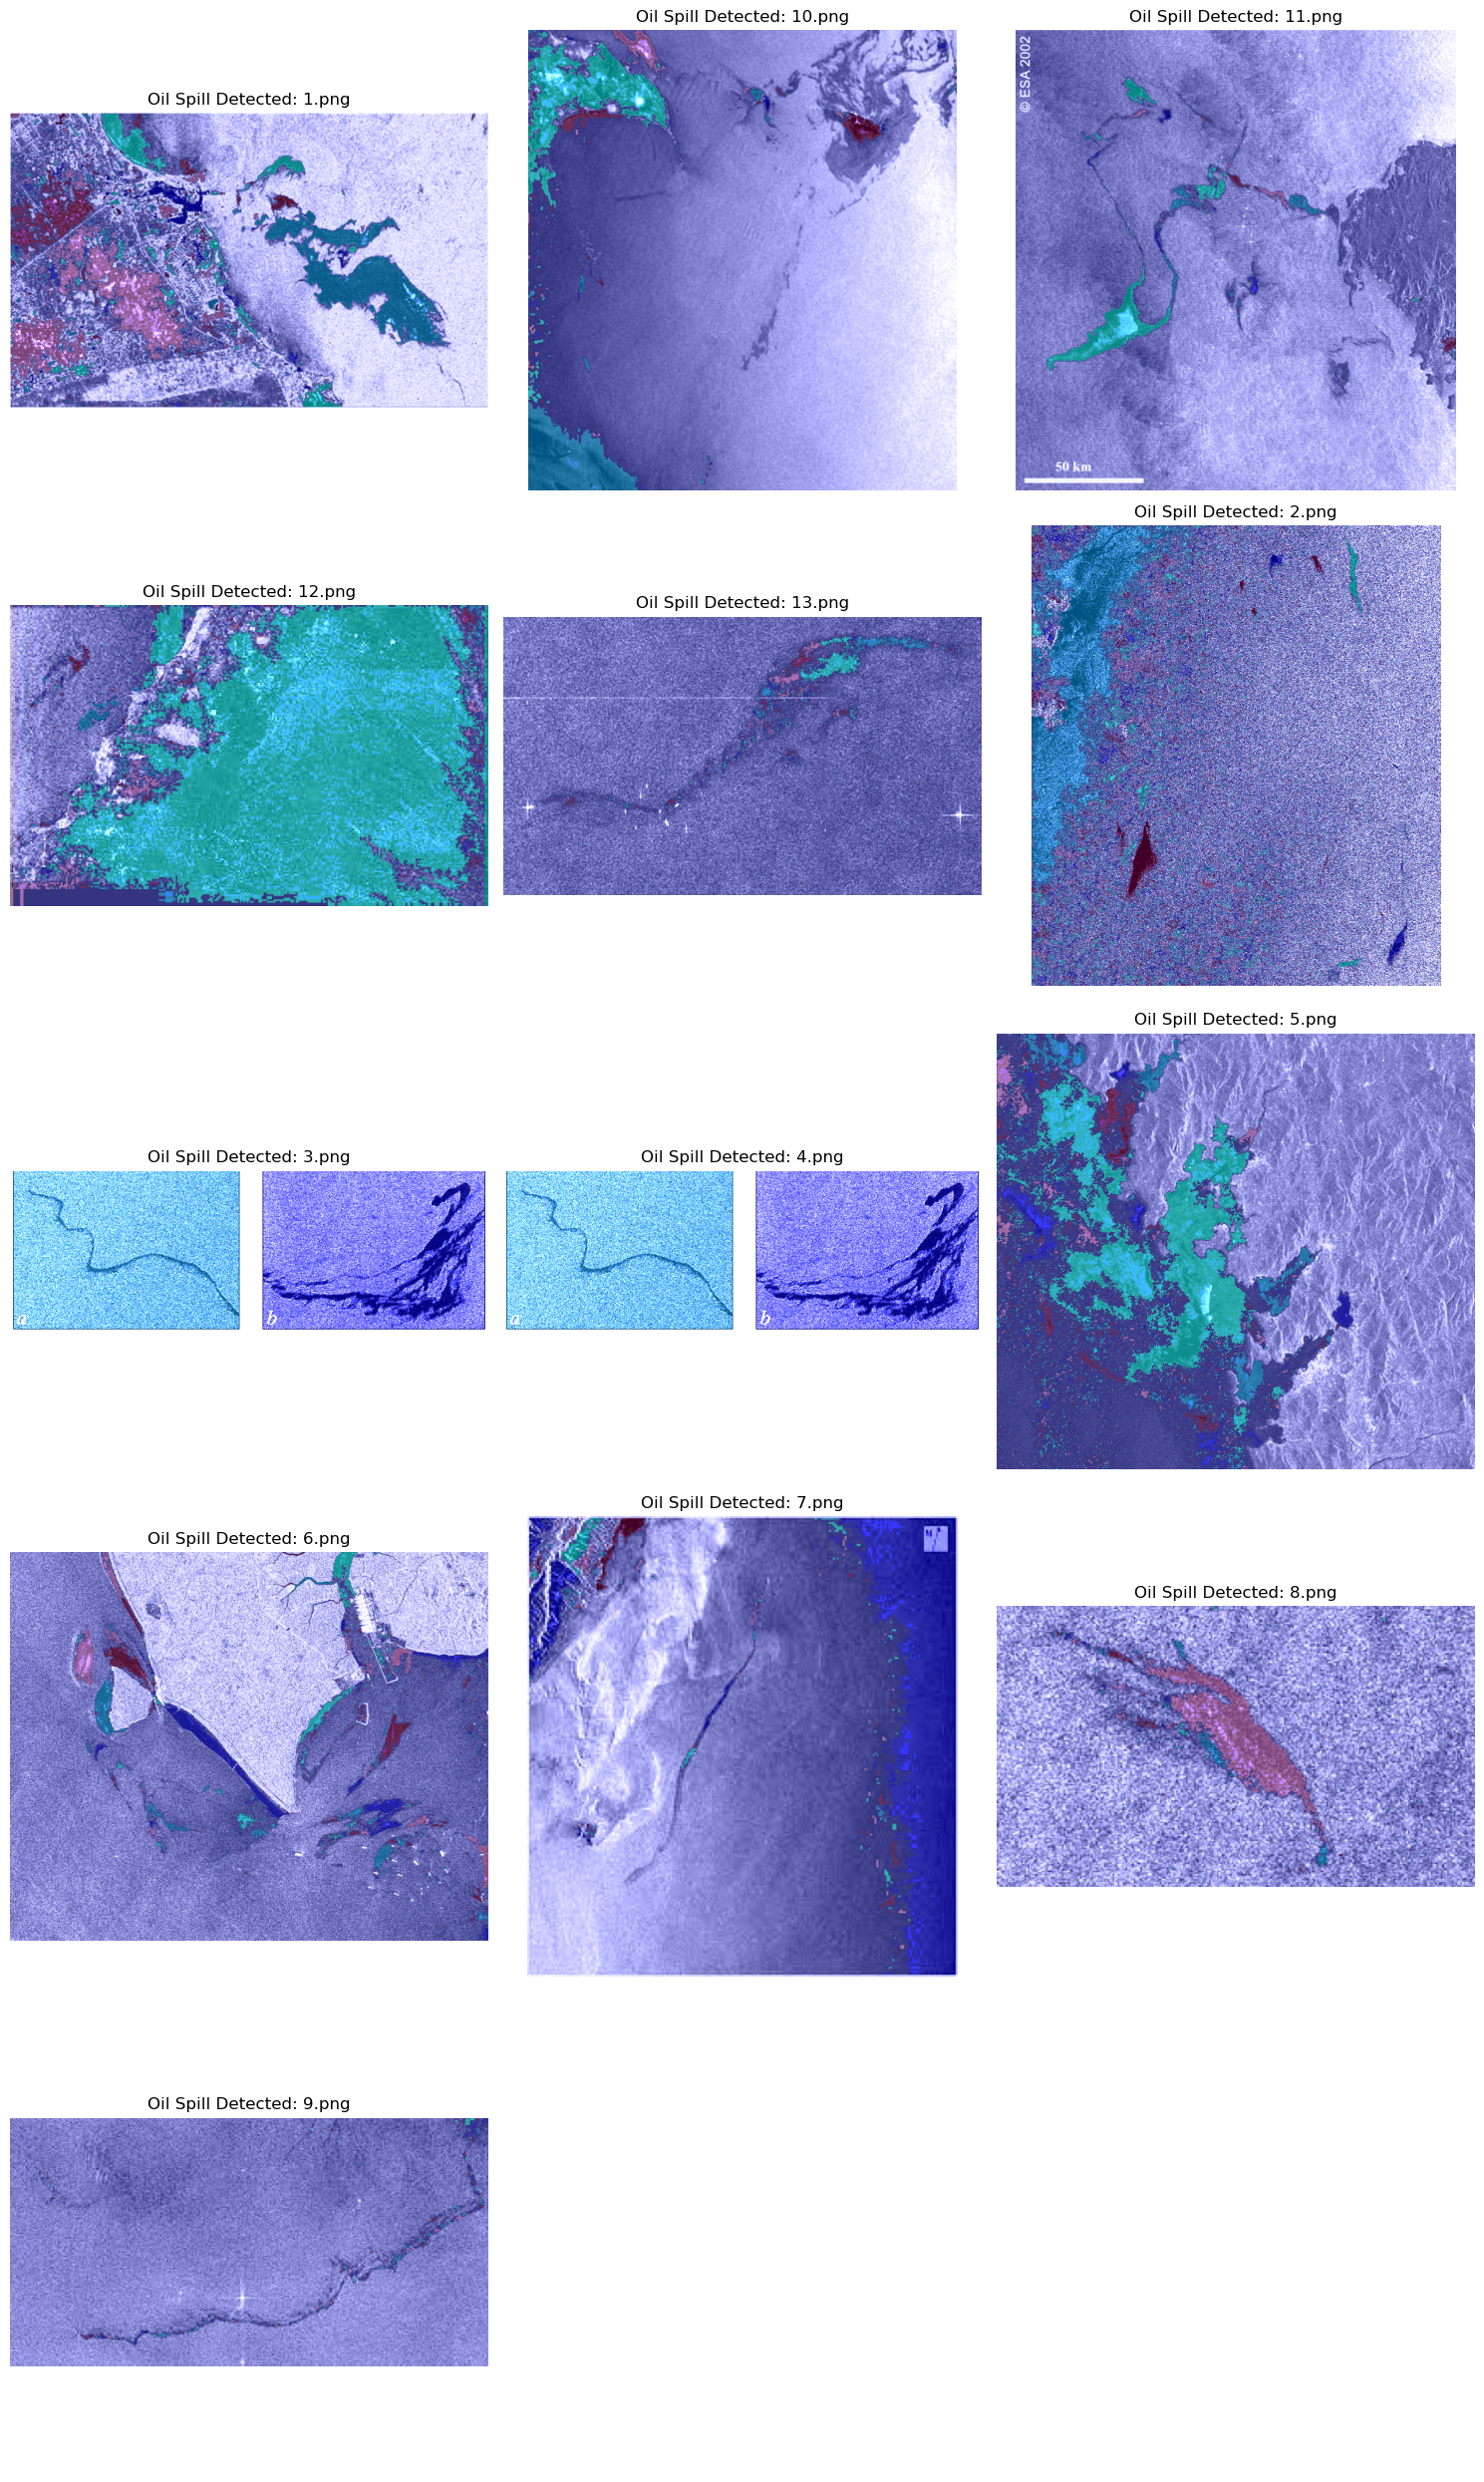

In [5]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# Directory where the oil spill images are stored
image_directory = "E:\\PROJECT FOLDER\\OIL SPILL TRAIL DATASET"  # Provide the correct path

# Function to detect oil spill in an image and return the processed image
def detect_oil_spill(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply thresholding to detect dark regions (potential oil spills)
    _, thresholded_image = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours of the dark patches (potential oil spills)
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Load the original image in color for visualization
    original_image = cv2.imread(image_path)
    
    # If oil spill detected, apply color to the detected regions
    if len(contours) > 0:
        # Create a mask for the oil spills (draw contours filled in rainbow colors on the mask)
        mask = np.zeros_like(original_image)
        rainbow_colors = [
            (255, 0, 0),    # Red
            (255, 165, 0),  # Orange
            (255, 255, 0),  # Yellow
            (75, 0, 130),   # Indigo
            (238, 130, 238) # Violet
        ]

        # Draw contours with rainbow colors
        for i, contour in enumerate(contours):
            color = rainbow_colors[i % len(rainbow_colors)]  # Cycle through the rainbow colors
            cv2.drawContours(mask, [contour], -1, color, thickness=cv2.FILLED)

        # Apply the mask to the original image for visualization
        result_image = cv2.addWeighted(original_image, 1, mask, 0.5, 0)

        # Highlight other regions like ocean in different colors (optional)
        # For example, you can set blue for the ocean and leave other areas intact
        ocean_mask = cv2.bitwise_not(thresholded_image)  # Invert threshold to highlight ocean
        ocean_mask_colored = cv2.cvtColor(ocean_mask, cv2.COLOR_GRAY2BGR)
        ocean_mask_colored[np.where((ocean_mask_colored == [255, 255, 255]).all(axis=2))] = [255, 0, 0]  # Blue for ocean
        
        result_image = cv2.addWeighted(result_image, 1, ocean_mask_colored, 0.3, 0)

        return True, result_image  # Oil spill detected, return the image with highlights
    else:
        return False, original_image  # No oil spill detected, return the original image

# Initialize lists to store results
detected_images = []
image_titles = []

# Test oil spill detection on all images and store results with color grading
for image_file in os.listdir(image_directory):
    image_path = os.path.join(image_directory, image_file)
    spill_detected, processed_image = detect_oil_spill(image_path)
    
    # Convert BGR to RGB for displaying with matplotlib
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
    detected_images.append(processed_image_rgb)
    
    # Prepare titles based on detection result
    if spill_detected:
        image_titles.append(f"Oil Spill Detected: {image_file}")
    else:
        image_titles.append(f"No Oil Spill: {image_file}")

# Plot all images together
num_images = len(detected_images)
cols = 3  # Number of columns in the grid
rows = (num_images + cols - 1) // cols  # Calculate rows based on the number of images

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Iterate through the images and display them
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(detected_images[i])
        ax.set_title(image_titles[i])
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide extra axes

plt.tight_layout()
plt.show()

In [ ]:
def detect_oil_spill(image_path, output_path):
    # Function implementation
    pass

import os

# Path to the directory containing images
image_directory = "D:\\my_flask_app\\static\\oil_spill_images"

# File to store titles
titles_file_path = os.path.join(image_directory, 'titles.txt')

# List of image files
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]
titles = []

# Temporary directory to store processed images
temp_directory = os.path.join(image_directory, 'temp')
os.makedirs(temp_directory, exist_ok=True)

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    output_path = os.path.join(temp_directory, image_file)  # Temporary file path for processed images
    
    # Call detect_oil_spill with both image_path and output_path
    spill_detected = detect_oil_spill(image_path, output_path)
    title = f"Oil Spill Detected: {image_file}" if spill_detected else f"No Oil Spill Detected: {image_file}"
    titles.append(title)

# Write titles to the file
with open(titles_file_path, 'w') as file:
    for title in titles:
        file.write(f"{title}\n")